In [7]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

In [8]:
merged_df = pd.read_csv('../../data/life/life_data.csv')
# merged_df.head(), merged_df.shape, merged_df.columns.unique()

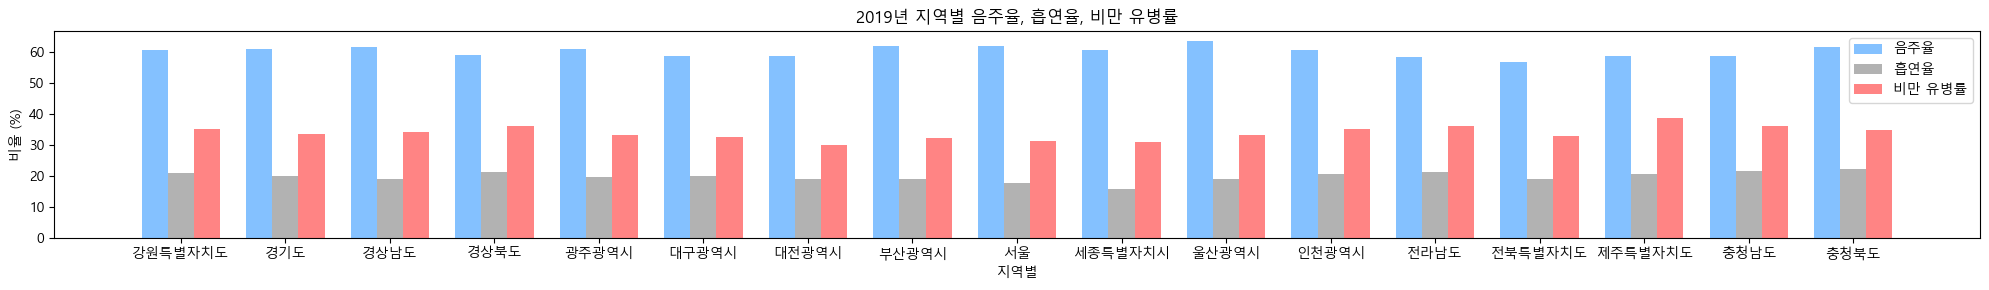

In [9]:
# 지역별 음주율, 흡연율, 비만유병률 시각화
data_2019 = merged_df[merged_df['시점'] == 2019]

labels = data_2019['지역별']
x = range(len(labels))

alcohol_rates = data_2019['음주율']
smoking_rates = data_2019['흡연율']
obesity_rates = data_2019['비만유병률']

bar_width = 0.25

plt.figure(figsize=(20, 3))
plt.bar(x, alcohol_rates, width=bar_width, label='음주율', color=(0.2, 0.6, 1.0, 0.6), align='center', )
plt.bar([p + bar_width for p in x], smoking_rates, width=bar_width, label='흡연율', color=(0.5, 0.5, 0.5, 0.6), align='center')
plt.bar([p + bar_width * 2 for p in x], obesity_rates, width=bar_width, label='비만 유병률', color=(1.0, 0.2, 0.2, 0.6), align='center')

plt.xlabel('지역별')
plt.ylabel('비율 (%)')
plt.title('2019년 지역별 음주율, 흡연율, 비만 유병률')
plt.xticks([p + bar_width for p in x], labels)
plt.legend()

plt.tight_layout()
plt.show()

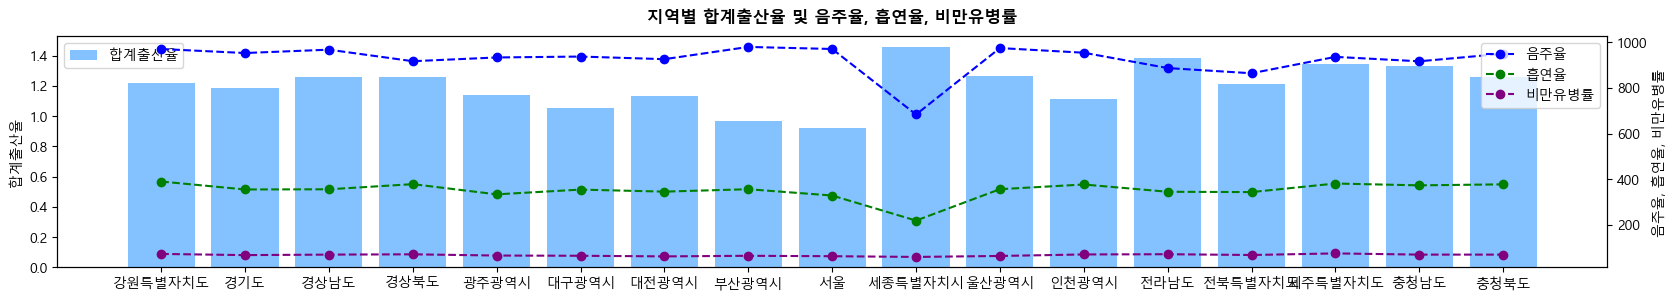

In [10]:
# 합계출산율과 음주율, 흡연율, 비만유병률 시각화
merged_df['합계출산율'] = pd.to_numeric(merged_df['합계출산율'], errors='coerce')
fertility_data = merged_df.groupby('지역별')['합계출산율'].mean().reset_index()

asb_data = {
    '음주율': merged_df.groupby('지역별')['음주율'].sum(),
    '흡연율': merged_df.groupby('지역별')['흡연율'].sum(),
    '비만유병률': merged_df.groupby('지역별')['비만유병률'].sum()
}
asb_df = pd.DataFrame(asb_data).reset_index()

fig, ax1 = plt.subplots(figsize=(20, 3))

ax1.bar(fertility_data['지역별'], fertility_data['합계출산율'], color=(0.2, 0.6, 1.0, 0.6), label='합계출산율', alpha=0.6)
ax1.set_title('지역별 합계출산율 및 음주율, 흡연율, 비만유병률', pad=10, fontweight='bold')
ax1.set_ylabel('합계출산율', fontsize=10)
ax1.set_xticks(range(len(fertility_data['지역별'])))
ax1.set_xticklabels(fertility_data['지역별'])

ax2 = ax1.twinx()
colors = ['blue', 'green', 'purple', 'brown']
for idx, category in enumerate(asb_df.columns[1:]):
    ax2.plot(asb_df['지역별'], asb_df[category], 
             marker='o', label=category, color=colors[idx], linestyle='--')

ax2.set_ylabel('음주율, 흡연율, 비만유병률', fontsize=10)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')